## Homework 3, Problem 2 on homogeneous Poisson processes

ECE C143A/C243A, Spring Quarter 2020, Prof. J.C. Kao, TAs J. Lee, T. Monsoor.


## Background

The goal of this notebook is to model a neuron as a homogeneous Poisson processes and evaluate its properties. We will consider a simulated neuron that has a cosine tuning curve described in equation (1.15) in *TN* (*TN* refers to *Theoretical Neuroscience* by Dayan and Abbott.)

$$\lambda(s) = r_0 + (r_\text{max} - r_0)\cos(s-s_\text{max})$$

where $\lambda$ is the firing rate (in spikes per second), $s$ is the reaching angle of the arm, $s_\text{max}$ is the reaching angle associated with the maximum response $r_\text{max}$, and $r_0$ is an offset that shifts the tuning curve up from the zero axis.  This will be refered as tuning equation in the following questions.

Let $r_0=35$, $r_\text{max}=60$, and $s_\text{max}=\pi/2$.

Note: If you are not as familiar with Python, be aware that if 1 is of type `int`, then 1 / a where a is any `int` greater than 1 will return 0, rather than a real number between 0 and 1.  This is because Python will return an `int` if both inputs are `int`s.  If instead you write 1.0 / a, you will get out the desired output, since 1.0 is of type `float`.

In [1]:
"""
ECE C143/C243 Homework-3 Problem-2

"""
import numpy as np
import matplotlib.pyplot as plt
import nsp as nsp # these are helper functions that we provide.
import scipy.special

# Load matplotlib images inline
%matplotlib inline

# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2

### (a) (6 points) Spike trains
For each of the following reaching condition ($s=k \cdot \pi/4$, where $k = 0,1,\ldots,7$), generate 100 spike trains  according to a homogeneous Poisson process. Each spike train should have a duration of 1 second.  You can think of each of each spike train sequence as a trial.  Therefore, we generate 100 trials of the neuron spiking according to a homogeneous Poisson Process for 8 reach directions.
  
Your code for this section should populate a 2D `numpy` array, `spike_times` which has dimensions `num_cons` $\times$ `num_trials` (i.e., it is $8 \times 100$).  Each element of this 2D numpy array is a numpy array containing the spike times for the neuron on a given condition and trial.  Note that this array may have a different length for each trial.

e.g., `spike_times.shape` should return `(8, 100)` and
`spike_times[0,0]` should return the spike times on the first trial for a reach to the target at $0$ degrees.  In one instantiation, our code returns that `spike_times[0,0]` is:

`array([   0.        ,    5.94436383,   10.85691999,   26.07821145,
         50.02836141,   67.417219  ,   74.2948356 ,  119.19210112,
        139.41789878,  176.59511596,  244.40788916,  267.3643421 ,
        288.42590046,  324.3770265 ,  340.26911602,  407.75730065,
        460.76250631,  471.23773964,  489.41659607,  514.60180131,
        548.71822693,  565.6036432 ,  586.20557118,  601.11595447,
        710.37485206,  751.60837895,  879.93536952,  931.26983289,
        944.1130483 ,  949.38455374,  963.22509374,  964.67365483,
        966.3865719 ,  974.3657882 ,  987.25729081])`
        
Of course, this varies based off of random seed. Also note that time at 0 is not a spike.

In [2]:
## 2a
bin_width = 20                             # (ms)
s = np.arange(8)*np.pi/4                   # (radians)
num_cons = np.size(s)                       # num_cons = 8 in this case, number of directions
r_0 = 35 # (spikes/s)
r_max = 60 # (spikes/s)
s_max = np.pi/2 # (radians)
T = 1000 #trial length (ms)
num_trials = 100 # number of spike trains to generate

tuning = r_0 + (r_max-r_0)*np.cos(s-s_max) # tuning curve
spike_times = np.empty((num_cons, num_trials), dtype=list)

for con in range(num_cons):
    s_0 = s[con] # Extracts reach angle
    l = r_0 + (r_max - r_0) * np.cos(s_0 - s_max) # Calculates lambda
    
    for rep in range(num_trials):
        #====================================================#
        # YOUR CODE HERE:
        #   Generate homogeneous Poisson process spike trains.
        #   You should populate the np.ndarray 'spike_times' according
        #   to the above description.
        #====================================================#
        # Generates spike train for each trial, excluding first time of 0.0
        spike_times[con, rep] = nsp.GeneratePoissonSpikeTrain(T, l)[1:] 
        #====================================================#
        # END YOUR CODE
        #====================================================#

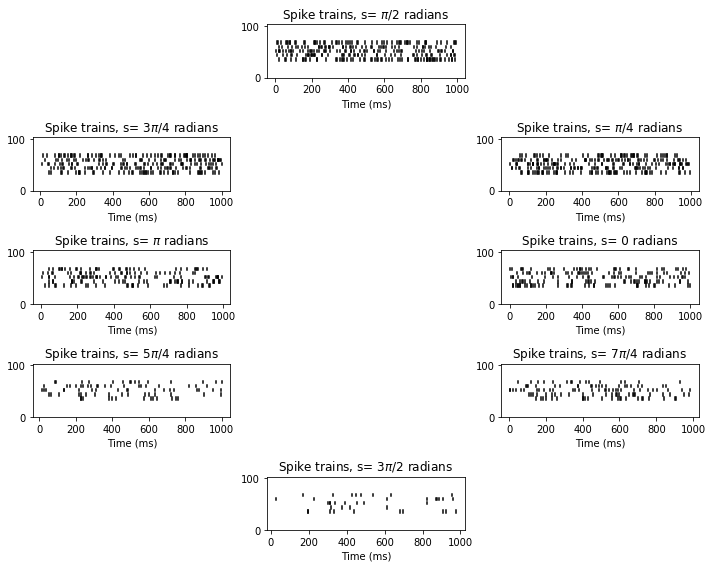

In [3]:
s_labels = ['0', '$\pi$/4', '$\pi$/2', '3$\pi$/4', '$\pi$', '5$\pi$/4', '3$\pi$/2', '7$\pi$/4']
num_plot_rows = 5
num_plot_cols = 3
subplot_indx = [9, 6, 2, 4, 7, 10, 14, 12]
num_rasters_to_plot = 5 # per condition

# Generate and plot homogeneous Poisson process spike trains
plt.figure(figsize=(10,8))
for con in range(num_cons):

    # Plot spike rasters
    plt.subplot(num_plot_rows, num_plot_cols, subplot_indx[con])    
    nsp.PlotSpikeRaster(spike_times[con, 0:num_rasters_to_plot])
    
    plt.title('Spike trains, s= '+s_labels[con]+' radians')
    plt.tight_layout()

### Plotting the spike rasters.  
  
The following code plot 5 spike trains for each reaching angle in the same format as shown in Figure 1.6(A) in *TN*. You should take a look at this code to understand what it's doing.  You may also want to look at the `PlotSpikeRaster` function from `nsp`.  

The plots should make intuitive sense given the tuning parameters.

### (b) (5 points) Plot spike histograms

For each reaching angle, find the spike histogram by taking spike counts in non-overlapping 20 ms bins, then averaging across the 100 trials.  Plot the 8 resulting spike histograms around a circle, as in part (a).  This time, as we'll allow you to represent the data as you like, you will have to also plot each histogram on your own.  The spike histograms should have firing rate (in spikes / second) as the vertical axis and time (in msec, not time bin index) as the horizontal axis.  

Suggestion: you can use plt.bar to plot the histogram, it is important to set the `width` for this function, e.g. width = 12. 

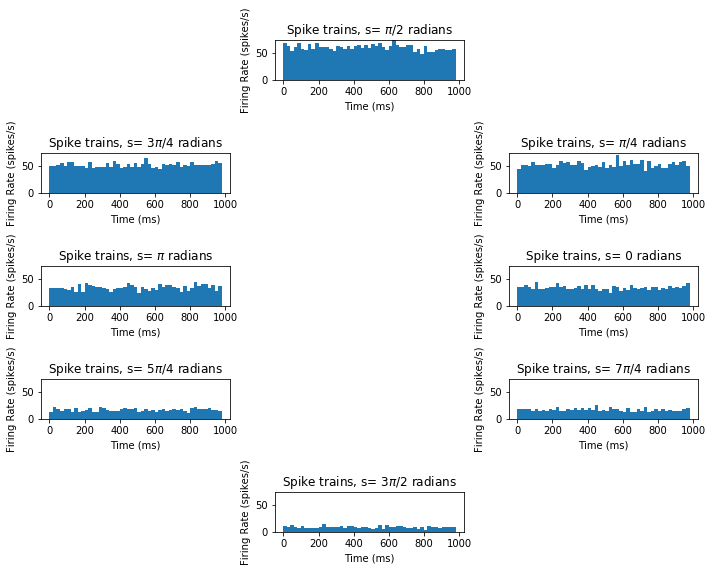

In [4]:
## 2b

plt.figure(figsize=(10,8))

b = [i * 20 for i in range(50)] # Creates bin list

for con in range(num_cons):
    plt.subplot(num_plot_rows,num_plot_cols,subplot_indx[con])
    #====================================================#
    # YOUR CODE HERE:
    #   Generate and plot spike histogram for this condition
    #====================================================#
    hist_values = np.zeros(49) # Creates empty numpy array
    
    for trial in range(num_trials):
        hist, bin_edges = np.histogram(spike_times[con, trial], b)
        hist_values = np.add(hist_values, hist)
      
    # Divide by 100 (trials), divide by 0.02 (20 milliseconds)
    hist_values = np.divide(hist_values, 2.0) 
    plt.bar(bin_edges[:-1], hist_values, width = 20, align = "edge")
    plt.xlabel("Time (ms)")
    plt.ylabel("Firing Rate (spikes/s)")
    plt.ylim(0, r_max + 15)
    #====================================================#
    # END YOUR CODE
    #====================================================#
    plt.title('Spike trains, s= '+s_labels[con]+' radians')
    plt.tight_layout()

### (c) (4 points)Tuning curve

For each trial, count the number of spikes across the entire trial. Plots these points on the axes like shown in Figure 1.6(B) in *TN*, where the x-axis is reach angle and the y-axis is firing rate. There should be 800 points in the plot (but some points may be on top of each other due to the discrete nature of spike counts).  For each reaching angle, find the mean firing rate across the 100 trials, and plot the mean firing rate using a red point on the same plot.  Now, plot the tuning curve of this neuron in green on the same plot.  
  

(0, 6.283185307179586)

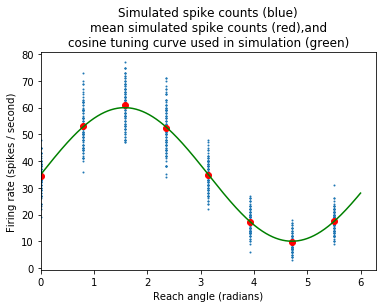

In [5]:
## 2c    
spike_counts = np.zeros((num_cons, num_trials)) # each element in spike_counts is the total spike count for this reach direction and trial 
#====================================================#
# YOUR CODE HERE:
#   Plot the single trial spike counts and the tuning curve
#   on top of each other.
#====================================================#
x = [] # List to hold x-coordinates of all points
y = [] # List to hold firing rates for all points
avg_x = [] # List to hold eight reach directions
avg_y = [] # List to hold mean firing rates for each reach angle

tuning_x = np.linspace(0, 6, 6000)
tuning_y = r_0 + (r_max - r_0) * np.cos(tuning_x - s_max) # Tuning curve

for con in range(num_cons):
    s_0 = [s[con] for i in range(num_trials)]
    x.append(s_0) # Populate x with 100 copies of each reach angle
    avg_x.append(s[con])
    
    counter = []
    mean_spikes = 0.0 # Stores mean firing rate
    
    for trial in range(num_trials):
        num_spikes = len(spike_times[con, trial])
        y.append(num_spikes) # This is the firing rate; time/trial is 1 second
        counter.append(num_spikes)
        mean_spikes += num_spikes
    
    spike_counts[con, :] = counter # Update spike_counts list accordingly
    
    # Calculate mean firing rate
    mean_spikes = np.divide(mean_spikes, float(num_trials)) 
    avg_y.append(mean_spikes) # Append mean firing rate

plt.scatter(x, y, s = 1) # Scatters all 800 points
plt.scatter(avg_x, avg_y, c = "red") # Scatters mean firing rates
plt.plot(tuning_x, tuning_y, c = "green") # Plots tuning curve
#====================================================#
# END YOUR CODE
#====================================================#
plt.xlabel('Reach angle (radians)')
plt.ylabel('Firing rate (spikes / second)')
plt.title('Simulated spike counts (blue)\n'+
           'mean simulated spike counts (red),and\n'+
           'cosine tuning curve used in simulation (green)')
plt.xlim(0, 2*np.pi)

#### Question: Do the mean firing rates lie near the tuning curve?

#### Your answer: The mean firing rates do lie near, or approximately near, the tuning curve.

### (d) (6 points) Count distribution
For each reaching angle, plot the *normalized* distribution
(i.e., normalized so that the area under the distribution equals
one) of spike counts (using the same counts from part (c)).  Plot
the 8 distributions around a circle, as in part (a).  Fit a Poisson
distribution to each empirical distribution and plot it on top of
the corresponding empirical distribution. 

Please plot the empirical distribution as well as the fit

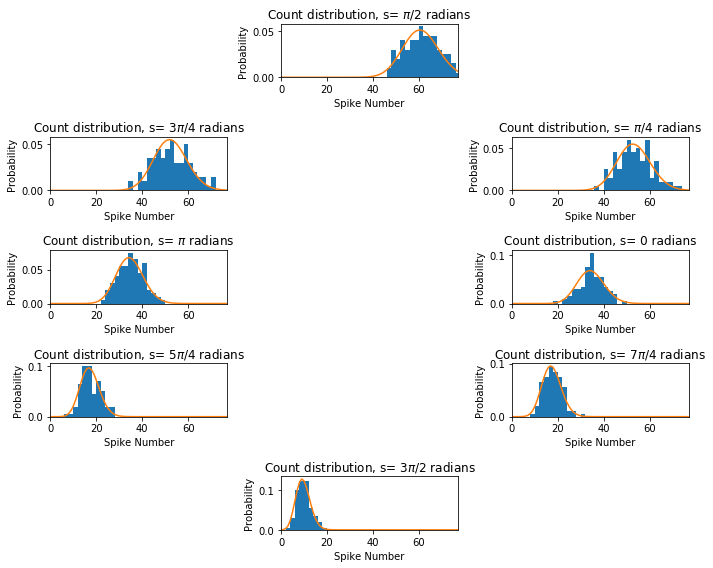

In [6]:
##2d

plt.figure(figsize=(10,8))
max_count = np.max(spike_counts)
spike_count_bin_centers =  np.arange(0,max_count,1)

for con in range(num_cons):
    plt.subplot(num_plot_rows,num_plot_cols,subplot_indx[con])
    
    #====================================================#
    # YOUR CODE HERE:
    #   Calculate the empirical mean for the Poisson spike
    #   counts, and then generate a curve reflecting the probability
    #   mass function of the Poisson distribution as a function
    #   of spike counts.
    #====================================================#
    # Plots normalized histogram
    b = [i * 2 for i in range(40)] # Create bin list
    plt.hist(spike_counts[con], bins = b, density = True) 
    
    trial = spike_counts[con, :] # Obtains data from each trial
    mean = sum(trial) / float(num_trials) # Equivalent to lambda
    k = [i for i in range(100)]
    
    # List that holds Poisson distribution values
    poison = [((mean ** k) * np.exp(-mean)) / np.math.factorial(k) for k in k]
    #====================================================#
    # END YOUR CODE
    #====================================================#
    
    #====================================================#
    # YOUR CODE HERE:
    #   Plot the empirical count distribution, and on top of it 
    #   plot your fit Poisson distribution.
    #====================================================#
    plt.plot(k, poison) # Plots the Poisson distribution
    plt.xlabel("Spike Number")
    plt.ylabel("Probability")
    #====================================================#
    # END YOUR CODE
    #====================================================#
    plt.xlim([0, max_count])
    plt.title('Count distribution, s= '+ s_labels[con]+' radians')
    plt.tight_layout()  

#### Question:  
Are the empirical distributions well-fit by Poisson distributions?

#### Your answer: The empirical distributions are reasonably well-fit by the Poisson distributions.

### (e)(4 points) Fano factor
For each reaching angle, find the mean and variance of the spike 
counts across the 100 trials (using the same spike counts from part
(c)).  Plot the obtained mean and variance on the axes shown in
Figure 1.14(A) in *TN*.  There should be 8 points in this plot
-- one per reaching angle.  

Text(0.5, 1.0, 'Mean v. Variance of Spike Counts')

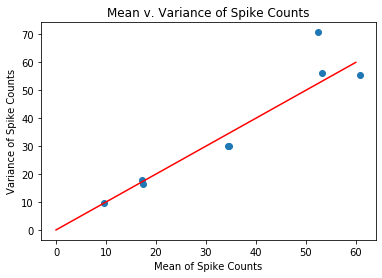

In [7]:
## 2e
#====================================================#
# YOUR CODE HERE:
#   Calculate and plot the mean and variance for each of
#   the 8 reaching conditions.  Mean should be on the 
#   x-axis and variance on the y-axis.
#====================================================#
mean = [] # List to store mean spike counts
variance = [] # List to store variance of spike counts

for con in range(num_cons):
    # Append the average spike count
    mean.append(sum(spike_counts[con, :]) / float(num_trials)) 
    
    total = 0.0 # Tracks variance of spike counts
    for trial in range(num_trials):
        total += (spike_counts[con, trial] - mean[con]) ** 2.0
    
    total /= float(num_trials)
    variance.append(total)

# 45 Degree Diagonal
x = np.linspace(0, 60, 600)
y = x

# Plot Appropriately
plt.scatter(mean, variance)
plt.plot(x, y, c = "red")
plt.xlabel("Mean of Spike Counts")
plt.ylabel("Variance of Spike Counts")
plt.title("Mean v. Variance of Spike Counts")
#====================================================#
# END YOUR CODE
#====================================================#

#### Question:
Do these points lie near the 45 deg diagonal, as would be expected of a Poisson distribution?

#### Your answer: The points do appear to lie near the 45 degree diagonal.

### (f) (5 points) Interspike interval (ISI) distribution
For each reaching angle, plot the normalized distribution of
ISIs. Plot the 8 distributions around a circle, as in part (a).  Fit
an exponential distribution to each empirical distribution and plot
it on top of the corresponding empirical distribution.  

Please plot the empirical distribution as well as the fit

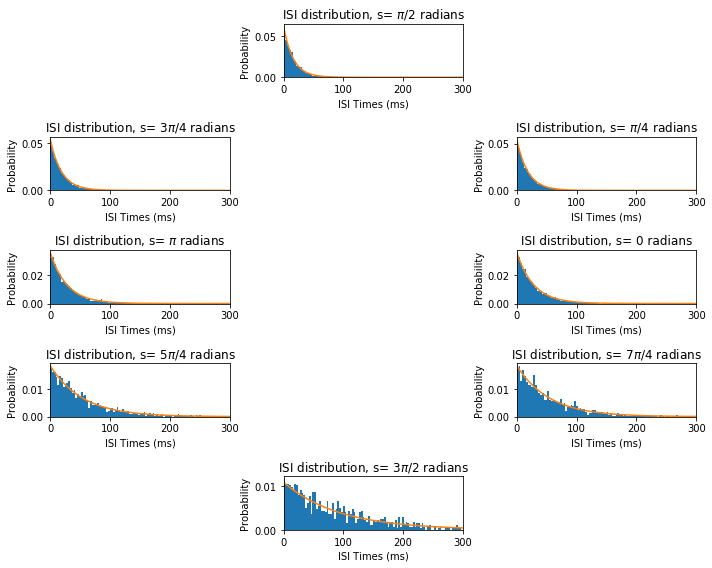

In [8]:
## 2f
plt.figure(figsize=(10,8))

for con in range(num_cons) :
    plt.subplot(num_plot_rows,num_plot_cols,subplot_indx[con])
    #====================================================#
    # YOUR CODE HERE:
    #   Calculate the interspike interval (ISI) distribution
    #   by finding the empirical mean of the ISI's, which 
    #   is the inverse of the rate of the distribution.
    #====================================================#
    isi_dist_row = [] # List to keep track of all ISI times
    for trial in range(num_trials):
        counter = spike_times[con, trial] # Obtains spike train for one trial
        
        for i in range(len(counter)):
            if (i == 0):
                t_isi = counter[i]
            else: # Calculate the interspike interval
                t_isi = counter[i] - counter[i - 1] 
            isi_dist_row.append(t_isi)
        
    # Calculates average of each reach angle
    mean_isi = sum(isi_dist_row) / len(isi_dist_row) 
    
    # Plots the normalized distribution
    b = [i * 3 for i in range(100)] # Create bin list
    plt.hist(isi_dist_row, bins = b, density = "True") 
    #====================================================#
    # END YOUR CODE
    #====================================================#  
    
    #====================================================#
    # YOUR CODE HERE:
    #   Plot Interspike interval (ISI) distribution
    #====================================================#
    l = 1.0 / mean_isi # Calculates lambda for an exponential distribution
    x = np.linspace(0, 300, 600)
    exponential = l * np.exp(-l * x) # Exponential distribution equation
    
    plt.plot(x, exponential) # Plot the exponential distribution
    plt.xlabel("ISI Times (ms)")
    plt.ylabel("Probability")
    plt.xlim(0, 300)
    #====================================================#
    # END YOUR CODE
    #====================================================#   
    plt.title('ISI distribution, s= '+ s_labels[con]+' radians')
    plt.tight_layout() 

#### Question:
Are the empirical distributions well-fit by exponential distributions?

#### Your answer: The empirical distributions are reasonably well-fit by the exponential distributions. 

### (g) (5 points) Coefficient of variation ($C_V$)
  For each reaching angle, find the average ISI and $C_V$ of the ISIs.
  Plot the resulting values on the axes shown in Figure 1.16 in
  *TN*.  There should be 8 points in this plot.  


(0.0, 1.05)

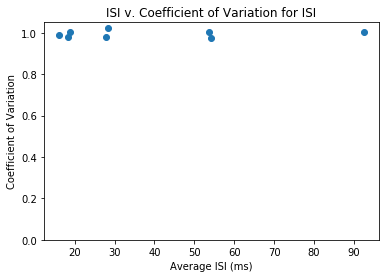

In [9]:
#2g
#====================================================#
# YOUR CODE HERE:
# Calculate and plot coeffcient of variation
#====================================================#
avg_isi = [] # List to hold average ISI values
c_v = [] # List to hold coefficient of variation values

for con in range(num_cons):
    isi_dist_row = [] # List to keep track of ISI times
    
    for trial in range(num_trials):
        counter = spike_times[con, trial] # Obtains spike train for one trial
        
        for i in range(len(counter)):
            if (i == 0):
                t_isi = counter[i]
            else: # Calculate the interspike interval
                t_isi = counter[i] - counter[i - 1] 
            isi_dist_row.append(t_isi)
        
    # Calculates the average of each reach angle
    mean_isi = sum(isi_dist_row) / len(isi_dist_row) 
    avg_isi.append(mean_isi)
    
    total = 0.0 # Keeps track of variance calculation
    
    for time in isi_dist_row:
        total += (time - mean_isi) ** 2
        
    total /= float(len(isi_dist_row))
    std_deviation = total ** 0.5
    c_v.append(std_deviation / mean_isi)

plt.scatter(avg_isi, c_v)
plt.xlabel("Average ISI (ms)")
plt.ylabel("Coefficient of Variation")
plt.title("ISI v. Coefficient of Variation for ISI")
plt.ylim(0.0, 1.05)
#====================================================#
# END YOUR CODE
#====================================================#

#### Question: 
Do the $C_V$ values lie near unity, as would be expected of a Poisson process?

#### Your answer: From the scatter plot, we can clearly see that the coefficients of variation lie around, and very close to, unity (or 1.00), as is expected of a Poisson process. 